In [2]:
from simulation import *
from aesthetics import *
from models import *
from data import *

import glob
import os as os
import re as re
import pandas as pd

%reload_ext autoreload
%autoreload 2
%matplotlib inline
mpl.rc('text', usetex=True)

In [99]:
df = pd.DataFrame()
adk_dir = '../../md-data/adenylate-kinase/'
adk_unbound_files = sorted(glob.glob(adk_dir + 'AdKDihedHist_apo-4ake/' + '*'))

for file in range(len(adk_unbound_files)):
    name = os.path.splitext(os.path.basename(adk_unbound_files[file]))[0]
    name = re.search('^[^_]*', name).group(0)
    this = simulation(data_source='adk_md_data')
    this.name = name
    this.simulate()
    flux_with_catalysis = np.mean(this.flux_u + this.flux_b)
    flux_with_catalysis_std = np.std(this.flux_u + this.flux_b)

    this.catalytic_rate = 0
    this.simulate()
    flux_without_catalysis = np.mean(this.flux_u + this.flux_b)
    flux_without_catalysis_std = np.std(this.flux_u + this.flux_b)

    df = df.append(pd.DataFrame({'Flux with catalysis': flux_with_catalysis,
                            'Flux with catalysis Std': flux_with_catalysis_std,
                            'Flux without catalysis': flux_without_catalysis,
                            'Flux without catalysis Std': flux_without_catalysis_std,
                            'File': name,
                            'Ratio': flux_with_catalysis / flux_without_catalysis,
                            }, index=[0]), ignore_index=True)

In [100]:
df.sort_values(by='Flux with catalysis').head()

,File,Flux with catalysis,Flux with catalysis Std,Flux without catalysis,Flux without catalysis Std,Ratio
332,chi2THR175,-156.701403,0.000378,-0.000204,0.000390,769482.849065
423,chi3TYR133,-131.783735,0.000612,-0.000230,0.000347,573193.064131
341,chi2TYR181,-81.446152,0.000385,0.002493,0.003291,-32674.600623
450,chi4LYS13,-55.211105,0.000426,-0.001076,0.001534,51300.067177
428,chi3TYR24,-43.153630,0.000438,0.000180,0.000707,-240119.378227


In [102]:
total_angles = len(df)
some_flux = len(df[df['Flux with catalysis'] > 1])
print('{} / {}'.format(some_flux, total_angles))

56 / 1138


# Investigate chi2THR175

/mnt/639f049e-1c5c-4215-bb93-e396da93aa2b/projects/nonequilibrium/code/SG-model-v2/simulation.py:229: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  [extended_u[i] + self.load_function(i) for i in np.arange(-1*self.bins/2, self.bins + self.bins/2)],
/mnt/639f049e-1c5c-4215-bb93-e396da93aa2b/projects/nonequilibrium/code/SG-model-v2/simulation.py:233: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  [extended_b[i] + self.load_function(i) for i in np.arange(-1*self.bins/2, self.bins + self.bins/2)],


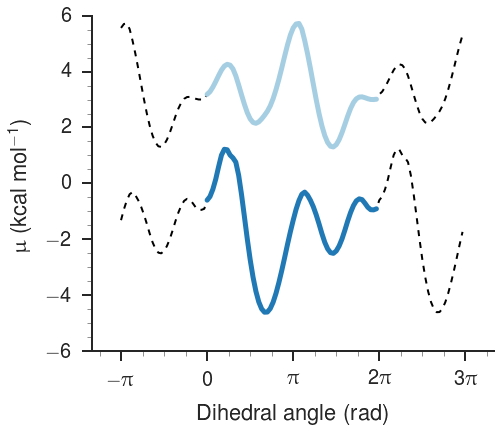

C_intrasurface = 	8.33e+10 second**-1
D = 			3.00e+12 degrees**2 second**-1
C_intersurface = 	1.00e+06 mol**-1 second**-1
Catalytic rate = 	312 second**-1
ATP concentration = 	0.002 M
Time step = 		1.00e-12 second


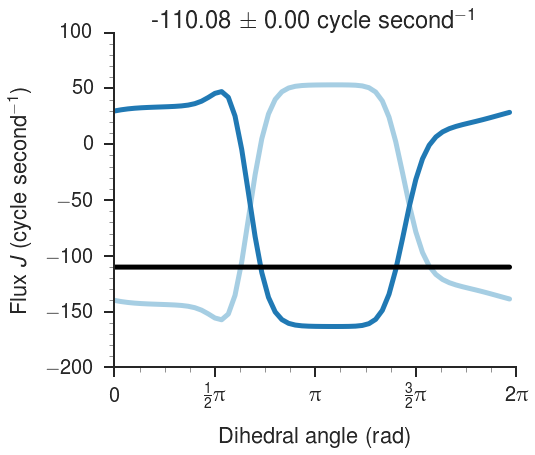

In [77]:
this = simulation(data_source='adk_md_data')
this.name = 'chi2THR175'
this.load = True
this.load_slope = -0.0001
this.simulate()
# this.plot_load()
this.plot_load_extrapolation()
this.plot_flux()

# Scan the load

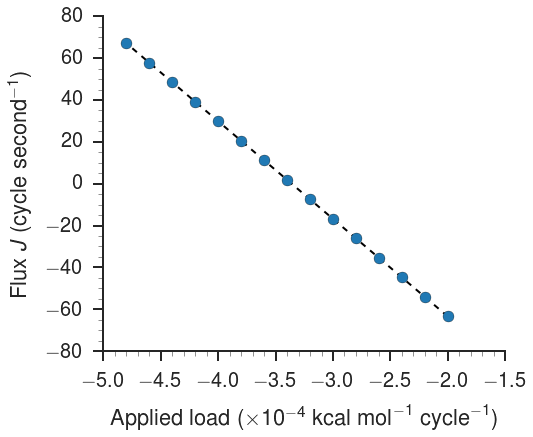

In [140]:
fig = plt.figure(figsize=(6*1.2,6), dpi=300)
ax = fig.add_subplot(111)
cmap = sns.color_palette("Paired", 10)
loads = []
fluxes = []
for load in np.arange(-2e-4, -5e-4, -2e-5):
    this = simulation(data_source='adk_md_data')
    this.name = 'chi2THR175'
    this.load = True
    this.load_slope = load
    this.simulate()
    ax.scatter(this.load_slope/1e-4, np.mean(this.flux_u + this.flux_b), c=cmap[1], s=120)
    loads.append(this.load_slope)
    fluxes.append(np.mean(this.flux_u + this.flux_b))
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(loads,fluxes)


ax.plot(np.arange(-2e-4, -5e-4, -2e-5)/1e-4, slope*np.arange(-2e-4, -5e-4, -2e-5) + intercept, c='k', ls='--', lw=2, zorder=-1,
       label='{0:2.2f}'.format(slope))
aesthetics.paper_plot(fig)
ax.set_xlabel(r'Applied load ($\times 10^{-4} \text{ kcal mol}^{-1} \text{ cycle}^{-1}$)')
ax.set_ylabel(r'Flux $J$ (cycle second$^{-1}$)')

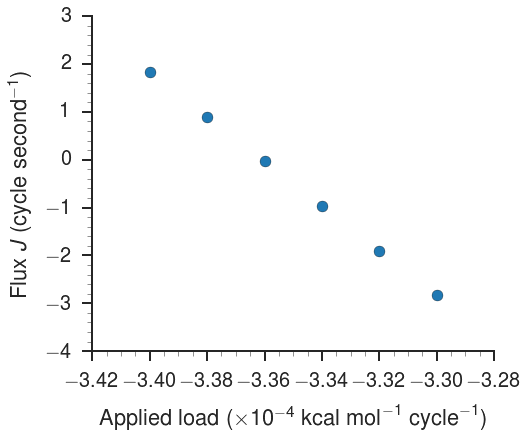

In [182]:
fig = plt.figure(figsize=(6*1.2,6), dpi=300)
ax = fig.add_subplot(111)
cmap = sns.color_palette("Paired", 10)
loads = []
fluxes = []
for load in np.arange(-3.3e-4, -3.4e-4, -2e-6):
    this = simulation(data_source='adk_md_data')
    this.name = 'chi2THR175'
    this.load = True
    this.load_slope = load
    this.simulate()
    ax.scatter(this.load_slope/1e-4, np.mean(this.flux_u + this.flux_b), c=cmap[1], s=120)
    loads.append(this.load_slope)
    fluxes.append(np.mean(this.flux_u + this.flux_b))
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(loads,fluxes)


# ax.plot(np.arange(-3.3e-4, -3.4e-4, -2e-5)/1e-4, slope*np.arange(-3.3e-4, -3.4e-4, -2e-5) + intercept, c='k', ls='--', lw=2, zorder=-1,
#        label='{0:2.2f}'.format(slope))
aesthetics.paper_plot(fig)
ax.set_xlabel(r'Applied load ($\times 10^{-4} \text{ kcal mol}^{-1} \text{ cycle}^{-1}$)')
ax.set_ylabel(r'Flux $J$ (cycle second$^{-1}$)')

## Calculate power

0.0131646388962


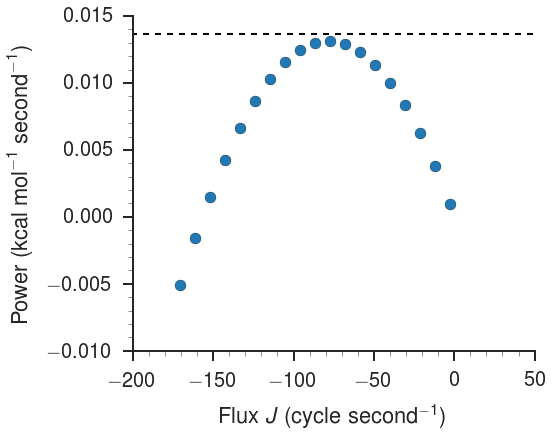

In [50]:
fig = plt.figure(figsize=(6*1.2,6), dpi=300)
ax = fig.add_subplot(111)
cmap = sns.color_palette("Paired", 10)
powers = []
for load in np.arange(-3.3e-4, 0.4e-4, 2e-5):
    this = simulation(data_source='adk_md_data')
    this.name = 'chi2THR175'
    this.load = True
    this.load_slope = load
    this.simulate()
    ax.scatter(  np.mean(this.flux_u + this.flux_b), (this.load_slope)*(np.mean(this.flux_u + this.flux_b)), c=cmap[1], s=120)
    powers.append((this.load_slope)*(np.mean(this.flux_u + this.flux_b)))

ax.axhline(y=np.max(powers) + 0.0005, xmin=-200, xmax=200, c='k', ls='--', lw=2)
aesthetics.paper_plot(fig)
ax.set_ylabel(r'Power ($\text{kcal mol}^{-1} \text{ second}^{-1}$)')
ax.set_xlabel(r'Flux $J$ (cycle second$^{-1}$)')
print(np.max(powers))

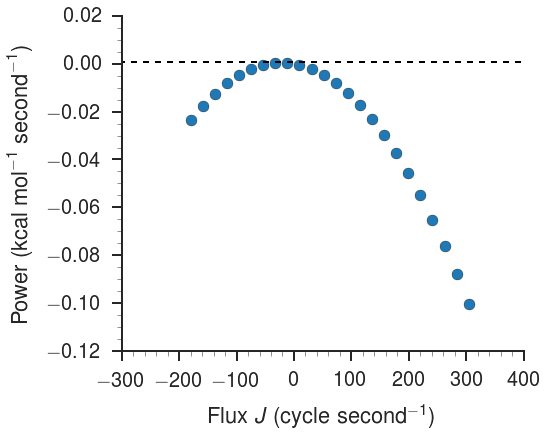

In [5]:
# chi3TYR24
fig = plt.figure(figsize=(6*1.2,6), dpi=300)
ax = fig.add_subplot(111)
cmap = sns.color_palette("Paired", 10)
powers = []
for load in np.arange(-3.3e-4, 1.4e-4, 2e-5):
    this = simulation(data_source='adk_md_data')
    this.name = 'chi3TYR24'
    this.load = True
    this.load_slope = load
    this.simulate()
    ax.scatter(np.mean(this.flux_u + this.flux_b), (this.load_slope)*(np.mean(this.flux_u + this.flux_b)), c=cmap[1], s=120)
    powers.append((this.load_slope)*(np.mean(this.flux_u + this.flux_b)))

ax.axhline(y=np.max(powers) + 0.0005, xmin=-200, xmax=200, c='k', ls='--', lw=2)
aesthetics.paper_plot(fig)
ax.set_ylabel(r'Power ($\text{kcal mol}^{-1} \text{ second}^{-1}$)')
ax.set_xlabel(r'Flux $J$ (cycle second$^{-1}$)')

## Maximum power

In [80]:
adk_dir = '../../md-data/adenylate-kinase/'
adk_unbound_files = sorted(glob.glob(adk_dir + 'AdKDihedHist_apo-4ake/' + '*'))

def return_negative_power(value, *args):
        this = simulation(data_source='adk_md_data')
        this.load = True
        this.load_slope = value[0]
        this.name = args[0]
        this.name = 'chi2THR175'
        this.simulate()
        power = (this.load_slope)*(np.mean(this.flux_u + this.flux_b))  
        if not args[1]:
            power = -1.0 * power
        # print('Load\t{0:0.2f}\tFlux\t{1:0.2f}\tPower\t{2:0.2f}'.format(this.load_slope, np.mean(this.flux_u + this.flux_b),
        #                                                            power))

        return power

for file in range(1):
    name = os.path.splitext(os.path.basename(adk_unbound_files[file]))[0]
    name = re.search('^[^_]*', name).group(0)
    this = simulation(data_source='adk_md_data')
    this.name = 'chi2THR175'
    this.simulate()
    flux_with_catalysis = np.mean(this.flux_u + this.flux_b)
    print(name, flux_with_catalysis)
    if flux_with_catalysis > 0:
        positive = True
        guess = 0.0001
    else:
        positive = False
        guess = -0.0001
    
    result = sc.optimize.fmin(return_negative_power, (guess), args= (name, positive), full_output=True)
print('Max power = {}'.format(-1 * result[1]))
print('Load at max power = {}'.format(result[0][0])) # I think

chi1ALA11 -156.701403029
Optimization terminated successfully.
         Current function value: -0.013144
         Iterations: 5
         Function evaluations: 10
Max power = 0.013143913946549153
Load at max power = -0.00017500000000000008


In [81]:
power_data = pd.DataFrame()
adk_dir = '../../md-data/adenylate-kinase/'
adk_unbound_files = sorted(glob.glob(adk_dir + 'AdKDihedHist_apo-4ake/' + '*'))

def return_negative_power(value, *args):
        this = simulation(data_source='adk_md_data')
        this.load = True
        this.load_slope = value[0]
        this.name = args[0]
        this.simulate()
        power = (this.load_slope)*(np.mean(this.flux_u + this.flux_b))  
        power = -1.0 * power
        # print('Load\t{0:0.5f}\tFlux\t{1:0.2f}\tPower\t{2:0.2f}'.format(this.load_slope, np.mean(this.flux_u + this.flux_b),
        #                                                            power))

        return power

for file in range(len(adk_unbound_files)):
    name = os.path.splitext(os.path.basename(adk_unbound_files[file]))[0]
    name = re.search('^[^_]*', name).group(0)
    this = simulation(data_source='adk_md_data')
    this.name = name
    this.simulate()
    flux_with_catalysis = np.mean(this.flux_u + this.flux_b)
    print(name, flux_with_catalysis)
    if flux_with_catalysis > 0:
        positive = True
        guess = 0.0001
    else:
        positive = False
        guess = -0.0001
    
    result = sc.optimize.fmin(return_negative_power, (guess), args= (name, positive), full_output=True)
    power_data = power_data.append(pd.DataFrame({'Flux with catalysis': flux_with_catalysis,
                'File': name,
                'Max Power': -1.0 * result[1],
                'Load at max power': result[0][0],
                }, index=[0]), ignore_index=True)


chi1ALA11 -0.167635631701
Optimization terminated successfully.
         Current function value: 0.000091
         Iterations: 6
         Function evaluations: 12
chi1ALA127 -0.00873668606703
Optimization terminated successfully.
         Current function value: 0.000429
         Iterations: 6
         Function evaluations: 12
chi1ALA17 -0.0383263865563
Optimization terminated successfully.
         Current function value: 0.000129
         Iterations: 6
         Function evaluations: 12
chi1ALA176 0.0163092862039
Optimization terminated successfully.
         Current function value: 0.000226
         Iterations: 6
         Function evaluations: 12
chi1ALA186 0.0162474184763
Optimization terminated successfully.
         Current function value: 0.000231
         Iterations: 6
         Function evaluations: 12
chi1ALA188 0.0182445937147
Optimization terminated successfully.
         Current function value: 0.000192
         Iterations: 6
         Function evaluations: 12
chi1ALA194 0.01

/Users/dslochower/Documents/Documents - Triceratops/projects/nonequilibrium/code/SG-model-v2/simulation.py:367: ComplexWarning: Casting complex values to real discards the imaginary part
  ss = abs(eigenvectors[:, self.eigenvalues.argmax()].astype(float))


Optimization terminated successfully.
         Current function value: -57.001244
         Iterations: 43
         Function evaluations: 98
chi3TYR171 31.8723027694
Optimization terminated successfully.
         Current function value: -0.000430
         Iterations: 6
         Function evaluations: 12
chi3TYR181 -22.6807177352
Optimization terminated successfully.
         Current function value: -0.000151
         Iterations: 6
         Function evaluations: 12
chi3TYR182 1.09526868668
Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 6
         Function evaluations: 12
chi3TYR193 1.60371683291
Optimization terminated successfully.
         Current function value: 0.000188
         Iterations: 6
         Function evaluations: 12
chi3TYR24 -43.1536302688
Optimization terminated successfully.
         Current function value: -0.000346
         Iterations: 5
         Function evaluations: 10
chi4ARG119 -0.0388159740747
Optimization termi

In [85]:
power_data.sort_values('Max Power', ascending=False).head(n=10)

,File,Flux with catalysis,Load at max power,Max Power
423,chi3TYR133,-131.783735,-0.799135,57.001244
1099,psiSER41,29.298257,1.045455,15.685991
341,chi2TYR181,-81.446152,-0.005295,0.214267
794,phiGLY12,23.286953,0.003095,0.036723
332,chi2THR175,-156.701403,-0.000175,0.013144
344,chi2TYR24,-26.253767,-0.000495,0.006878
450,chi4LYS13,-55.211105,-0.000255,0.006843
351,chi3ARG167,28.991705,0.000105,0.002390
315,chi2PHE81,17.317498,0.000105,0.001818
89,chi1ILE26,-20.791408,-0.000105,0.001755


/Users/dslochower/Documents/Documents - Triceratops/projects/nonequilibrium/code/SG-model-v2/simulation.py:367: ComplexWarning: Casting complex values to real discards the imaginary part
  ss = abs(eigenvectors[:, self.eigenvalues.argmax()].astype(float))


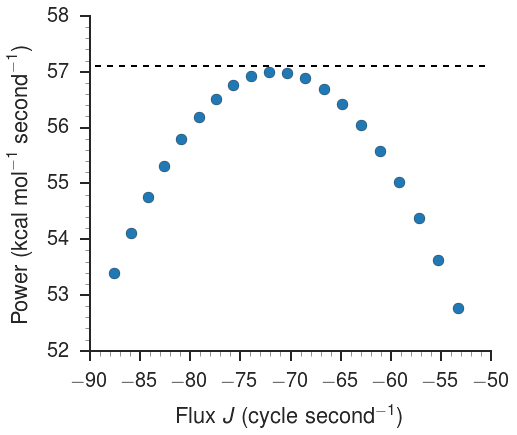

In [96]:
fig = plt.figure(figsize=(6*1.2,6), dpi=300)
ax = fig.add_subplot(111)
cmap = sns.color_palette("Paired", 10)
target = -0.79
for load in np.arange(target-0.2, target+0.2, 0.02):
    this = simulation(data_source='adk_md_data')
    this.name = 'chi3TYR133'
    this.load = True
    this.load_slope = load
    this.simulate()
    ax.scatter(np.mean(this.flux_u + this.flux_b), (this.load_slope)*(np.mean(this.flux_u + this.flux_b)), c=cmap[1], s=120)

this = simulation(data_source='adk_md_data')
this.name = 'chi3TYR133'
this.load = True
this.load_slope = target
this.simulate()
ax.axhline(y=(this.load_slope)*(np.mean(this.flux_u + this.flux_b))+0.1, xmin=-200, xmax=200, c='k', ls='--', lw=2, zorder=-1)

aesthetics.paper_plot(fig, scientific=False)
ax.set_ylabel(r'Power ($\text{kcal mol}^{-1} \text{ second}^{-1}$)')
ax.set_xlabel(r'Flux $J$ (cycle second$^{-1}$)')

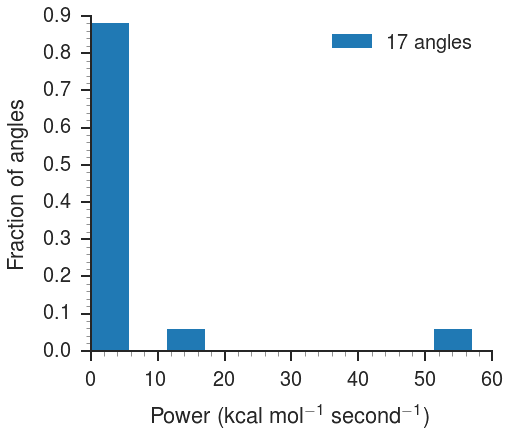

In [89]:
fig = plt.figure(figsize=(6*1.2,6), dpi=300)
ax = fig.add_subplot(111)
hist, bins = np.histogram(power_data[power_data['Max Power']>0.001]['Max Power'], bins=10, 
                          weights=np.ones_like(power_data[power_data['Max Power']>0.001]['Max Power'])/float(len(power_data[power_data['Max Power']>0.001]['Max Power'])))
width = 1.0 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
ax.bar(center, hist, align='center', width=width, edgecolor=None, lw=0, color=cmap[1], label=r'{} angles'.format(len(power_data[power_data['Max Power']>0.001]['Max Power'])))
ax.legend(loc=1)
ax.set_ylabel('Fraction of angles')
ax.set_xlabel('Power (kcal mol$^{-1}$ second$^{-1}$)')
aesthetics.paper_plot(fig)

## Efficiency

In [13]:
power_data = pd.DataFrame()
adk_dir = '../../md-data/adenylate-kinase/'
adk_unbound_files = sorted(glob.glob(adk_dir + 'AdKDihedHist_apo-4ake/' + '*'))
delta_g = 12 # kcal/mol converted from 20 kT (ish...)


def return_negative_power(value, *args):
        this = simulation(data_source='adk_md_data')
        this.load = True
        this.load_slope = value[0]
        this.name = args[0]
        this.simulate()
        power = (this.load_slope)*(np.mean(this.flux_u + this.flux_b))  
        power = -1.0 * power
        # print('Load\t{0:0.5f}\tFlux\t{1:0.2f}\tPower\t{2:0.2f}'.format(this.load_slope, np.mean(this.flux_u + this.flux_b),
        #                                                            power))

        return power

for file in range(len(adk_unbound_files)):
    name = os.path.splitext(os.path.basename(adk_unbound_files[file]))[0]
    name = re.search('^[^_]*', name).group(0)
    this = simulation(data_source='adk_md_data')
    this.name = name
    this.simulate()
    flux_with_catalysis = np.mean(this.flux_u + this.flux_b)
    print(name, flux_with_catalysis)
    if flux_with_catalysis > 0:
        positive = True
        guess = 0.0001
    else:
        positive = False
        guess = -0.0001
    
    result = sc.optimize.fmin(return_negative_power, (guess), args= (name, positive), full_output=True)
    efficiency = -1.0 * result[1] / (delta_g * np.sum(this.catalytic_rate * this.bound_population))
    
    print(np.sum(this.catalytic_rate * this.bound_population))
    power_data = power_data.append(pd.DataFrame({'Flux with catalysis': flux_with_catalysis,
                'File': name,
                'Max Power': -1.0 * result[1],
                'Load at max power': result[0][0],
                'Efficiency': efficiency,
                }, index=[0]), ignore_index=True)



chi1ALA11 -0.167635631701
Optimization terminated successfully.
         Current function value: 0.000091
         Iterations: 6
         Function evaluations: 12
312.0
chi1ALA127 -0.00873668606703
Optimization terminated successfully.
         Current function value: 0.000429
         Iterations: 6
         Function evaluations: 12
312.0
chi1ALA17 -0.0383263865563
Optimization terminated successfully.
         Current function value: 0.000129
         Iterations: 6
         Function evaluations: 12
312.0
chi1ALA176 0.0163092862039
Optimization terminated successfully.
         Current function value: 0.000226
         Iterations: 6
         Function evaluations: 12
312.0
chi1ALA186 0.0162474184763
Optimization terminated successfully.
         Current function value: 0.000231
         Iterations: 6
         Function evaluations: 12
312.0
chi1ALA188 0.0182445937147
Optimization terminated successfully.
         Current function value: 0.000192
         Iterations: 6
         Function e

/Users/dslochower/Documents/Documents - Triceratops/projects/nonequilibrium/code/SG-model-v2/simulation.py:367: ComplexWarning: Casting complex values to real discards the imaginary part
  ss = abs(eigenvectors[:, self.eigenvalues.argmax()].astype(float))


Optimization terminated successfully.
         Current function value: -57.001244
         Iterations: 43
         Function evaluations: 98
312.0
chi3TYR171 31.8723027694
Optimization terminated successfully.
         Current function value: -0.000430
         Iterations: 6
         Function evaluations: 12
312.0
chi3TYR181 -22.6807177352
Optimization terminated successfully.
         Current function value: -0.000151
         Iterations: 6
         Function evaluations: 12
312.0
chi3TYR182 1.09526868668
Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 6
         Function evaluations: 12
312.0
chi3TYR193 1.60371683291
Optimization terminated successfully.
         Current function value: 0.000188
         Iterations: 6
         Function evaluations: 12
312.0
chi3TYR24 -43.1536302688
Optimization terminated successfully.
         Current function value: -0.000346
         Iterations: 5
         Function evaluations: 10
312.0
chi4ARG119

In [14]:
power_data.sort_values(by = 'Efficiency', ascending=False).head(5)

,Efficiency,File,Flux with catalysis,Load at max power,Max Power
423,0.015225,chi3TYR133,-131.783735,-0.799135,57.001244
1099,0.004190,psiSER41,29.298257,1.045455,15.685991
341,0.000057,chi2TYR181,-81.446152,-0.005295,0.214267
794,0.000010,phiGLY12,23.286953,0.003095,0.036723
332,0.000004,chi2THR175,-156.701403,-0.000175,0.013144


In [16]:
power_data.sort_values(by = 'Max Power', ascending=False).head(5)

,Efficiency,File,Flux with catalysis,Load at max power,Max Power
423,0.015225,chi3TYR133,-131.783735,-0.799135,57.001244
1099,0.004190,psiSER41,29.298257,1.045455,15.685991
341,0.000057,chi2TYR181,-81.446152,-0.005295,0.214267
794,0.000010,phiGLY12,23.286953,0.003095,0.036723
332,0.000004,chi2THR175,-156.701403,-0.000175,0.013144


(array([  1.13600000e+03,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([ -8.97317378e-07,   1.52166153e-03,   3.04422038e-03,
          4.56677923e-03,   6.08933808e-03,   7.61189694e-03,
          9.13445579e-03,   1.06570146e-02,   1.21795735e-02,
          1.37021323e-02,   1.52246912e-02]),
 <a list of 10 Patch objects>)

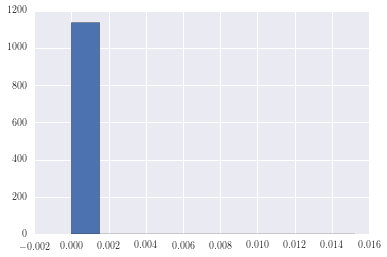

In [18]:
plt.hist(power_data['Efficiency'])

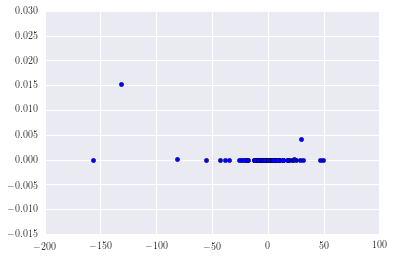

In [20]:
plt.scatter(power_data['Flux with catalysis'], power_data['Efficiency'])